In [62]:
#第二題
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [4]:

x.ts, x.ys
x.ys.shape

(10000,)

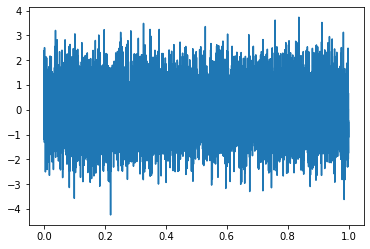

In [5]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)


In [6]:
x.ys.max(), x.ys.mean(), x.ys.std()


(3.7371467765762536, -0.011692745104373459, 0.99590823676501)

In [7]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

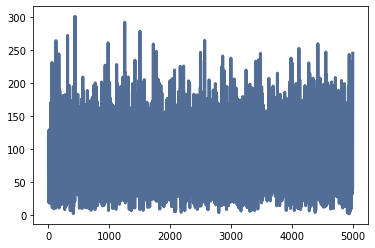

In [8]:
sx.plot()

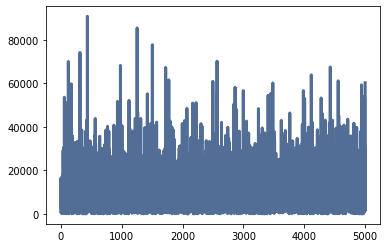

In [9]:
sx.plot_power()

In [10]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

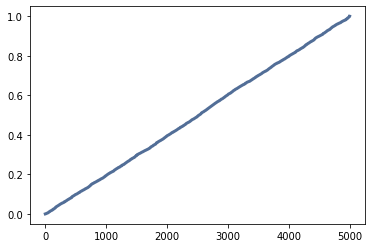

In [11]:
Sx.plot_power()

In [12]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

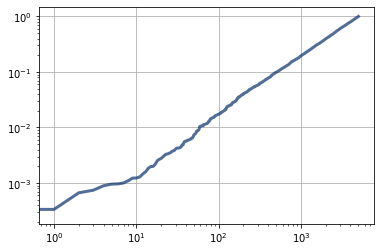

In [13]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [14]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

In [15]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

In [16]:
y.ys.max(), y.ys.mean(), y.ys.std()

(14.077247844587035, -71.3315922501152, 30.11190001907973)

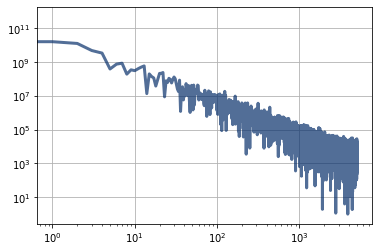

In [17]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

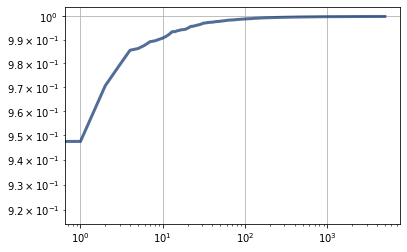

In [18]:

sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [19]:
sy.make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

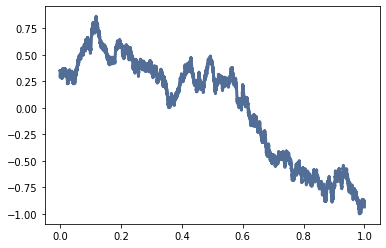

In [20]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [21]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

In [63]:
#第三題
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [23]:

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


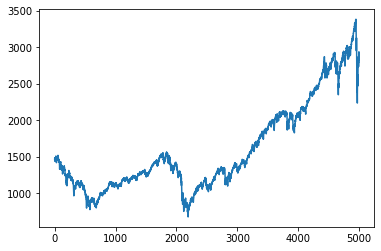

In [24]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [25]:
yWave= td.Wave(ys, framerate= 10000)

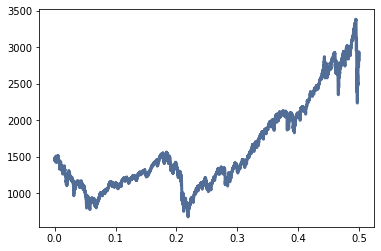

In [26]:
yWave.plot()

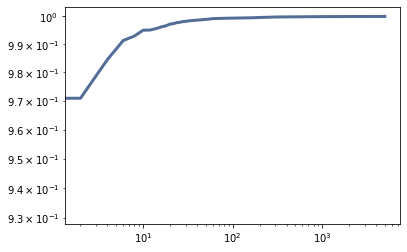

In [34]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [35]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

In [64]:
#第一題
# integrated_spectrum 之 log-log slope= .0003 近似於 0，
# 因此 yWave 近似Brownian Noise

In [48]:
import thinkdsp as td
import numpy as np

class LYTrombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times
        returns: float wave array
        """
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)

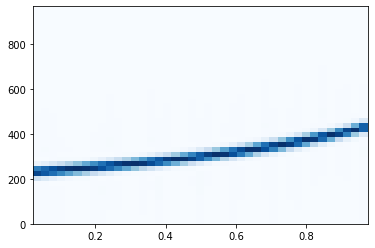

In [57]:
A3=  220 
E3=  330
A4=  440

s1= LYTrombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)

In [56]:
s2= LYTrombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)

In [55]:
w3= w1|w2

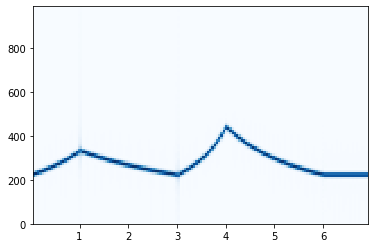

In [54]:
w= (
 LYTrombone(A3,E3).make_wave(1)
|LYTrombone(E3,A3).make_wave(2)
|LYTrombone(A3,A4).make_wave(1)
|LYTrombone(A4,A3).make_wave(2)
|LYTrombone(A3,A3).make_wave(1)
)
w.make_spectrogram(1024).plot(high=1000)


In [44]:
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]

In [53]:
song= [A,A,E,E,F1,F1,E,E]

s= LYTrombone(song[0],song[1]).make_wave(.5)
for x in song[1:]:
    s= (s|LYTrombone(x,x).make_wave(.5))